In [61]:
import matplotlib
import pandas as pd
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import os


import seaborn as sns
from matplotlib import rcParams

#绘图前的基本设置

myfont = fm.FontProperties(fname=r'C:\Windows\Fonts\Times New Roman.tiff') # 设置字体

# 设置matplotlib正常显示中文和负号

plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
# matplotlib.rcParams['font.sans-serif']=['NSimSun']   # 用黑体显示中文
# matplotlib.rcParams['axes.unicode_minus']=False     # 正常显示负号
matplotlib.rcParams['font.size'] = 18
# matplotlib.rcParams['font.family'] = 'sans-serif'  
matplotlib.rcParams['font.sans-serif'] = 'Times New Roman'  # NSimSun 新宋体字体   宋体：SimSuncss

%matplotlib inline  
#内嵌绘图，并且可以省略掉plt.show()这一步
os.chdir(r'E:\BaiduSyncdisk\热浪博士论文\计算表格\Chapter3')


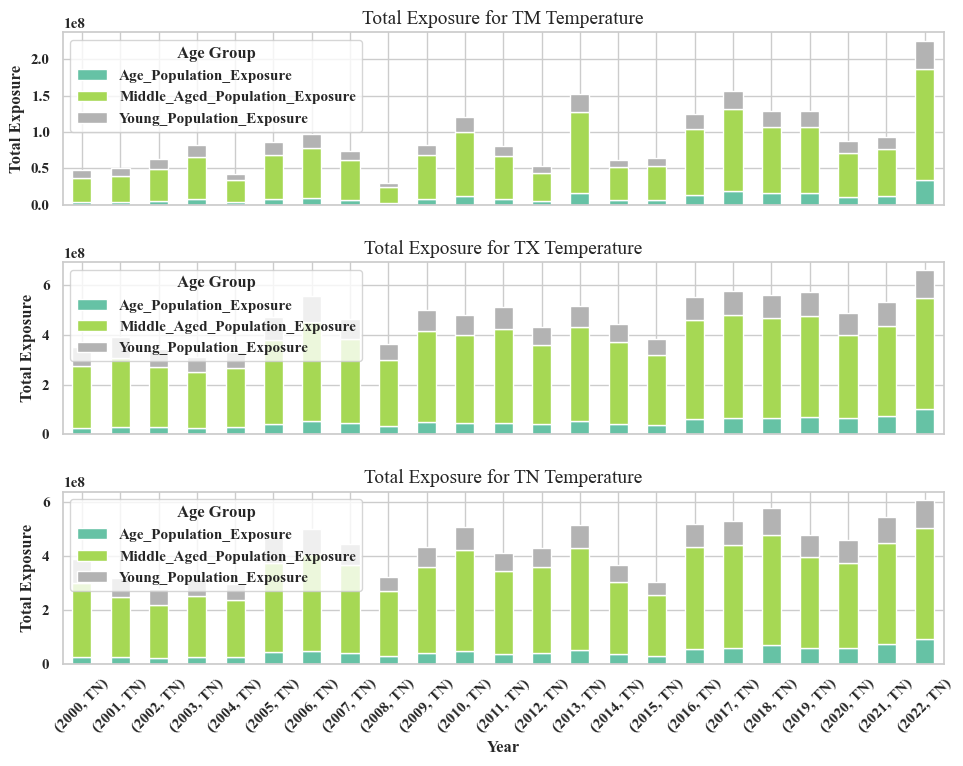

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('BY_exposure_by_year_and_province_all_temperatures.csv')

# Ensure that columns are of the correct type
data['Year'] = data['Year'].astype(int)
data['Province'] = data['Province'].astype(str)
data['Temp'] = data['Temp'].astype(str)

# Prepare the data to calculate the total exposure per year, grouped by temperature and age group
data_long = data.melt(id_vars=['Year', 'Temp'], 
                      value_vars=['Age_Population_Exposure', 'Young_Population_Exposure', 'Middle_Aged_Population_Exposure'], 
                      var_name='Age Group', 
                      value_name='Exposure')

# Sum the exposure values for each Year, Temp, and Age Group
exposure_by_year_temp = data_long.groupby(['Year', 'Temp', 'Age Group'], as_index=False)['Exposure'].sum()

# Pivot data for stacked bar plot (make 'Age Group' columns)
exposure_pivot = exposure_by_year_temp.pivot_table(index=['Year', 'Temp'], 
                                                   columns='Age Group', 
                                                   values='Exposure', 
                                                   aggfunc='sum').fillna(0)

# Set the plot style for better aesthetics
# sns.set(style="whitegrid")

# Create the figure with 3 subplots, one for each temperature type (TM, TX, TN)
fig, axes = plt.subplots(3, 1, figsize=(10, 8), sharex=True)

# List of temperature types (for iterating through)
temp_types = ['TM', 'TX', 'TN']

# Iterate through each temperature type and plot a stacked bar chart
for i, temp in enumerate(temp_types):
    ax = axes[i]
    
    # Filter data for the specific temperature type
    temp_data = exposure_pivot.loc[exposure_pivot.index.get_level_values('Temp') == temp]
    
    # Plot stacked bar chart for this temperature type
    temp_data.plot(kind='bar', stacked=True, ax=ax, colormap='Set2')
    
    # Set title and labels for each subplot
    ax.set_title(f'Total Exposure for {temp} Temperature', fontsize=14)
    ax.set_xlabel('Year', fontsize=12)
    ax.set_ylabel('Total Exposure', fontsize=12)
    
# Adjust the layout
plt.xticks(rotation=45)
plt.tight_layout()

# Add a common legend for all subplots
# fig.legend(title='Age Group', bbox_to_anchor=(1, 0.5), loc='center left')

# Display the plot
plt.show()


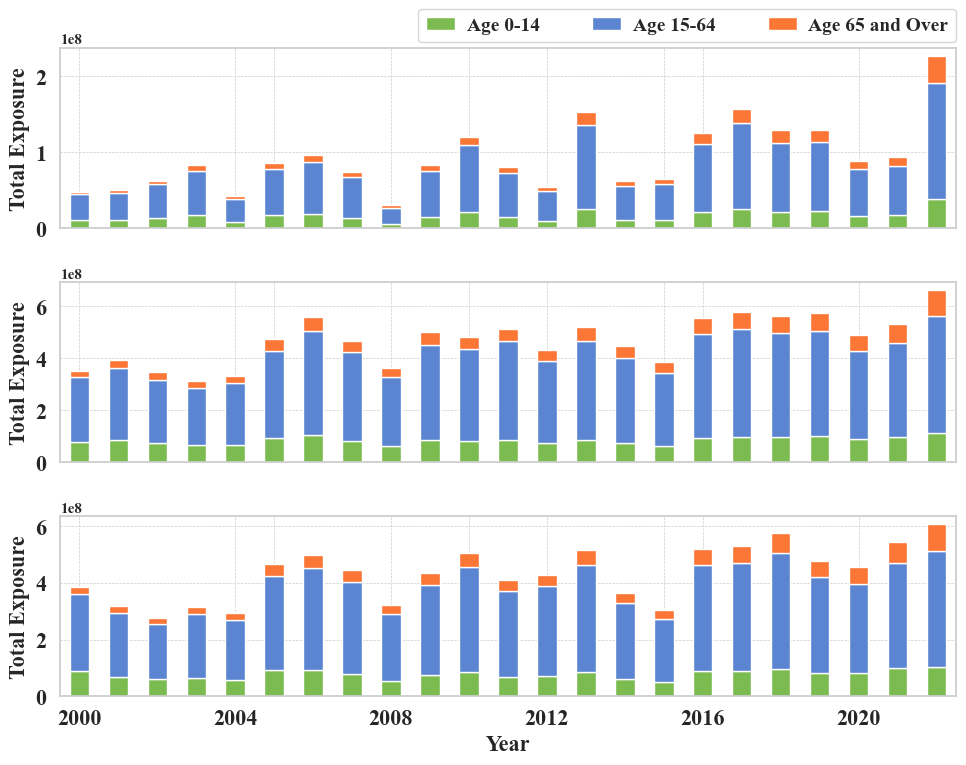

In [84]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('BY_exposure_by_year_and_province_all_temperatures.csv')

# Ensure that columns are of the correct type
data['Year'] = data['Year'].astype(int)
data['Province'] = data['Province'].astype(str)
data['Temp'] = data['Temp'].astype(str)

# Prepare the data to calculate the total exposure per year, grouped by temperature and age group
data_long = data.melt(id_vars=['Year', 'Temp'], 
                      value_vars=['Age_Population_Exposure', 'Young_Population_Exposure', 'Middle_Aged_Population_Exposure'], 
                      var_name='Age Group', 
                      value_name='Exposure')

# Sum the exposure values for each Year, Temp, and Age Group
exposure_by_year_temp = data_long.groupby(['Year', 'Temp', 'Age Group'], as_index=False)['Exposure'].sum()

# Pivot data for stacked bar plot (make 'Age Group' columns)
exposure_pivot = exposure_by_year_temp.pivot_table(index=['Year', 'Temp'], 
                                                   columns='Age Group', 
                                                   values='Exposure', 
                                                   aggfunc='sum').fillna(0)

# Customizing the legend labels
legend_labels = {
    'Age_Population_Exposure': 'Age 65 and Over',
    'Young_Population_Exposure': 'Age 0-14',
    'Middle_Aged_Population_Exposure': 'Age 15-64'
}

# Re-map the 'Age Group' column based on the mapping
data_long['Age Group'] = data_long['Age Group'].map(legend_labels)

# Re-pivot the data for plotting after remapping the Age Group
exposure_by_year_temp = data_long.groupby(['Year', 'Temp', 'Age Group'], as_index=False)['Exposure'].sum()
exposure_pivot = exposure_by_year_temp.pivot_table(index=['Year', 'Temp'], 
                                                   columns='Age Group', 
                                                   values='Exposure', 
                                                   aggfunc='sum').fillna(0)

# Define the custom colors for each age group
custom_colors = ['#7bbb50', '#5c85d1', '#fc7636']

# Create the figure with 3 subplots, one for each temperature type (TM, TX, TN)
fig, axes = plt.subplots(3, 1, figsize=(10, 8), sharex=True)

# List of temperature types (for iterating through)
temp_types = ['TM', 'TX', 'TN']

# Iterate through each temperature type and plot a stacked bar chart
for i, temp in enumerate(temp_types):
    ax = axes[i]
    
    # Filter data for the specific temperature type
    temp_data = exposure_pivot.loc[exposure_pivot.index.get_level_values('Temp') == temp]
    
    # Plot stacked bar chart for this temperature type
    temp_data.plot(kind='bar', stacked=True, ax=ax, color=custom_colors, legend=(temp == 'TM'))
    
    # Customize the legend for TM
    if temp == 'TM':
        ax.legend(fontsize=14, bbox_to_anchor=(0.4, 1.03, 0.6, 1.09), loc='lower left', 
                  handletextpad=0.6, ncol=3, mode="expand", borderaxespad=0., handlelength=1.5)
    
    # Set y-axis label
    ax.set_ylabel('Total Exposure', fontsize=16)
    ax.set_xlabel('Year', fontsize=16)

    # Increase the y-axis tick size and boldness
    ax.tick_params(axis='y', labelsize=16, labelrotation=0)
    for label in ax.get_yticklabels():
        label.set_fontweight('bold')
    
    # Customize gridlines (make them thinner)
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Adjust the x-axis ticks to show years from 2000 to 2022 with an interval of 4 years
years = exposure_pivot.index.get_level_values('Year').unique()
selected_years = years[::4]  # Select every 4th year
plt.xticks(ticks=range(0, len(years), 4), labels=selected_years, rotation=0, fontsize=16, fontweight='bold')

# Adjust the layout
plt.tight_layout()
plt.savefig(r'E:\BaiduSyncdisk\热浪博士论文\论文图片\PD-03-09-热浪暴露年龄差异-ALL-EHF,MAX,MIN.png', dpi=400, facecolor="none", transparent=True)
# Display the plot
plt.show()


In [92]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Define the regression function
def lm_func(df, col):
    """Simple linear model of a time series data, returns coef, R2, and p-value"""
    
    # Get Data
    X_year = np.array(df["Year"]).reshape((-1, 1))
    Y_stats = np.array(df[col]).reshape((-1, 1))

    # Add Intercept
    X_year_2 = sm.add_constant(X_year)

    # Regress
    model = sm.OLS(Y_stats, X_year_2).fit() 
        
    coef = model.params[1]
    
    # R2 and p-value
    r2 = model.rsquared_adj
    p = model.pvalues[1]
    
    return round(coef, 2), round(r2, 2), round(p, 2)

# Load the data
data = pd.read_csv('BY_exposure_by_year_and_province_all_temperatures.csv')

# Ensure that columns are of the correct type
data['Year'] = data['Year'].astype(int)
data['Temp'] = data['Temp'].astype(str)

# Prepare the data to calculate the total exposure per year, grouped by temperature and age group
data_long = data.melt(
    id_vars=['Year', 'Temp'], 
    value_vars=['Age_Population_Exposure', 'Young_Population_Exposure', 'Middle_Aged_Population_Exposure'], 
    var_name='Age Group', 
    value_name='Exposure'
)

# Sum the exposure values for each Year, Temp, and Age Group
exposure_by_year_temp = data_long.groupby(['Year', 'Temp', 'Age Group'], as_index=False)['Exposure'].sum()

# Calculate total exposure per year for each temperature type
total_exposure_by_temp = exposure_by_year_temp.groupby(['Year', 'Temp'], as_index=False)['Exposure'].sum()
total_exposure_by_temp.rename(columns={'Exposure': 'Total Exposure'}, inplace=True)

# Pivot data for individual age groups and total exposure
pivot_table = exposure_by_year_temp.pivot_table(
    index=['Year'], 
    columns=['Temp', 'Age Group'], 
    values='Exposure', 
    aggfunc='sum'
)
total_pivot_table = total_exposure_by_temp.pivot_table(
    index=['Year'], 
    columns=['Temp'], 
    values='Total Exposure', 
    aggfunc='sum'
)

# Initialize an empty list to store results
results = []

# Calculate metrics for individual age groups
for temp in pivot_table.columns.levels[0]:
    for age_group in pivot_table[temp].columns:
        # Prepare the data for regression
        values = pivot_table[temp][age_group].dropna()
        years = values.index.values

        # Create a DataFrame with year and values for regression
        df_temp = pd.DataFrame({'Year': years, 'Exposure': values.values})

        # Apply the regression function
        if len(df_temp) > 1:  # Ensure enough data points for regression
            coef, r2, p = lm_func(df_temp, 'Exposure')

            # Append the results
            results.append({
                'Temp': temp,
                'Category': age_group,
                'Annual Growth Rate': coef,
                'R-squared': r2,
                'P-value': p,
                'Type': 'Age Group'
            })

# Calculate metrics for total exposure
for temp in total_pivot_table.columns:
    # Prepare the data for regression
    values = total_pivot_table[temp].dropna()
    years = values.index.values

    # Create a DataFrame with year and values for regression
    df_temp = pd.DataFrame({'Year': years, 'Total Exposure': values.values})

    # Apply the regression function
    if len(df_temp) > 1:  # Ensure enough data points for regression
        coef, r2, p = lm_func(df_temp, 'Total Exposure')

        # Append the results
        results.append({
            'Temp': temp,
            'Category': 'Total Exposure',
            'Annual Growth Rate': coef,
            'R-squared': r2,
            'P-value': p,
            'Type': 'Total'
        })

# Convert results into a DataFrame
results_df = pd.DataFrame(results)

# Save the results as a CSV file
output_file_path = 'PD-03-10-table-exposure_growth_rate_by_temp_and_age.csv'
results_df.to_csv(output_file_path, index=False)

# Display the file path for the user to download
output_file_path


'PD-03-10-table-exposure_growth_rate_by_temp_and_age.csv'